In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
label_encoder = LabelEncoder()
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df['sales_channel']= label_encoder.fit_transform(df['sales_channel'])
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])
df['flight_day'] = label_encoder.fit_transform(df['flight_day'])

x= df.iloc[:,:-1]
y= df.iloc[:,-1]






Loading dataset...

Handling Missing Data...

Encoding Categorical Variables...

Encoding High-Cardinality Features...

Preparing Features and Target Variable...

Splitting Data into Training and Testing Sets...

Scaling Numerical Features...

Training Random Forest Model...

Performing Cross-Validation...
Cross-Validation Accuracy Scores: [0.851  0.4828 0.2464 0.3706 0.4996]
Mean Cross-Validation Accuracy: 0.4901

Evaluating Model on Test Set...

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.56     10000
weighted avg       0.82      0.86      0.81     10000

Test Set Accuracy: 0.8564

Generating Confusion Matrix...


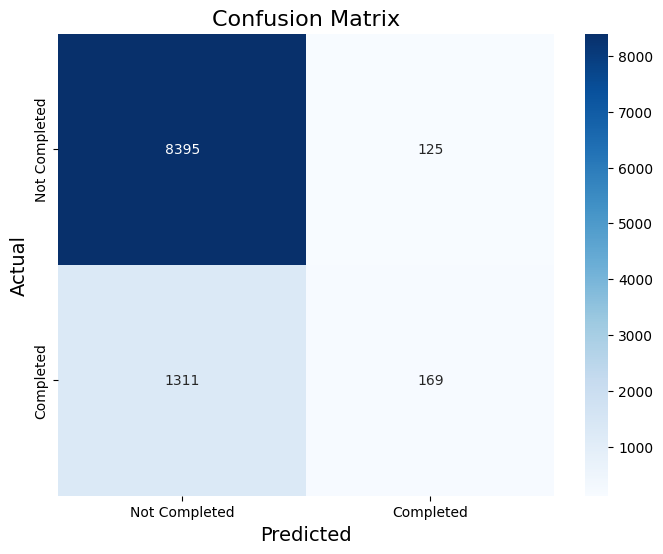


Analyzing Feature Importance...


<ipython-input-32-78675f3fa0ab>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


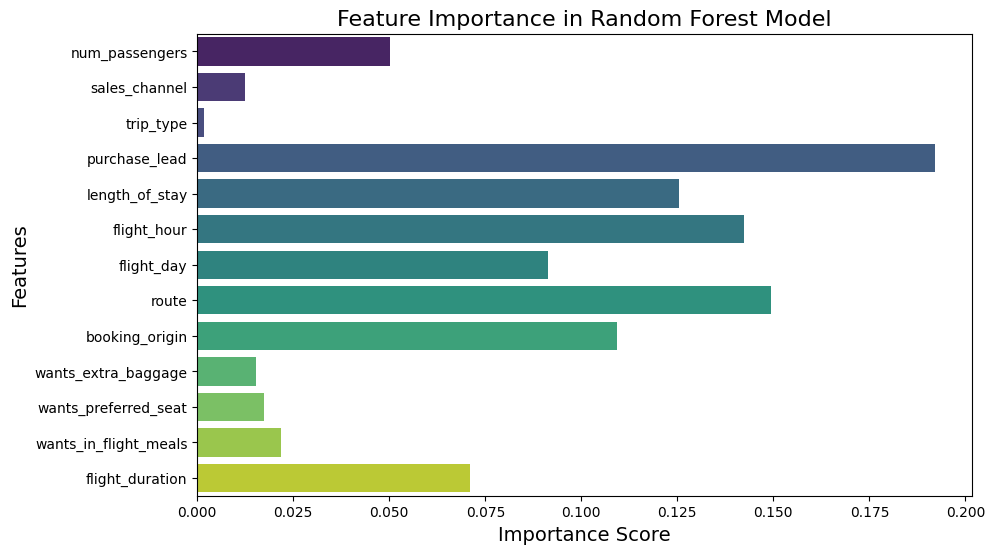


Final Summary of Key Insights:
1. Cross-Validation Accuracy: 49.01%
2. Test Set Accuracy: 85.64%

Top Features Influencing Booking Completion:
- num_passengers: 0.0501
- sales_channel: 0.0125
- trip_type: 0.0017
- purchase_lead: 0.1922
- length_of_stay: 0.1255
- flight_hour: 0.1423
- flight_day: 0.0914
- route: 0.1493
- booking_origin: 0.1093
- wants_extra_baggage: 0.0154
- wants_preferred_seat: 0.0173
- wants_in_flight_meals: 0.0218
- flight_duration: 0.0711


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


print("Loading dataset...")
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

print("\nHandling Missing Data...")
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


df = df.dropna(subset=['booking_complete'])
df['booking_complete'] = df['booking_complete'].astype(int)


print("\nEncoding Categorical Variables...")
label_encoder = LabelEncoder()
categorical_columns = ['sales_channel', 'trip_type', 'flight_day']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print("\nEncoding High-Cardinality Features...")
high_cardinality_columns = ['route', 'booking_origin']
for col in high_cardinality_columns:
    df[col] = label_encoder.fit_transform(df[col])

print("\nPreparing Features and Target Variable...")
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']


print("\nSplitting Data into Training and Testing Sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nScaling Numerical Features...")
scaler = StandardScaler()
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

print("\nTraining Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("\nPerforming Cross-Validation...")
cross_val_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")


print("\nEvaluating Model on Test Set...")
y_pred = rf_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")


print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.savefig("my_graph4.png", dpi=300, bbox_inches='tight')
plt.show()



print("\nAnalyzing Feature Importance...")
importances = rf_model.feature_importances_
features = X.columns


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance in Random Forest Model", fontsize=16)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.savefig("my_graph3.png", dpi=300, bbox_inches='tight')

plt.show()


print("\nFinal Summary of Key Insights:")
print(f"1. Cross-Validation Accuracy: {cross_val_scores.mean() * 100:.2f}%")
print(f"2. Test Set Accuracy: {test_accuracy * 100:.2f}%")
print("\nTop Features Influencing Booking Completion:")
for feature, importance in zip(features, importances):
    print(f"- {feature}: {importance:.4f}")
